# ID 5841 – Quantum Computing  
## Assignment 1 – Preliminaries: State Preparation and Entanglement

This notebook is intended as a scaffold for **Assignment 1** of ID 5841 (Quantum Computing), IIT Madras.  
It consolidates the relevant material from the provided Qiskit tutorial notebooks and adds the theoretical background and code templates needed to attempt each problem.  
**Important:** This notebook does **not** contain complete solutions; it only provides guidance, background, and non‑answer scaffolding.

## Setup and Installation

First, let's ensure all required packages are installed.

In [ ]:
# Install (uncomment if needed)
# !pip install "qiskit>=2.1.0" "qiskit-aer>=0.17.0" "qiskit-ibm-runtime>=0.40.1" numpy pylatexenc

## Importing Required Libraries

We begin by importing the necessary Python libraries. Qiskit provides tools to create, simulate, and visualize quantum circuits.

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

import numpy as np

## IBM Quantum account and backends (optional)

If you want to run the circuits on real IBMQ machines, log in using your IBM Quantum API token.  
You can skip this section if you only use simulators.


In [ ]:
# Optional: configure IBM Quantum
QiskitRuntimeService.save_account(
token="aRTLyP1k6UgBnjO4odaf7YQyUaUXBuMyFIqyXUzCfm2r", # Use the 44-character API_KEY you created and saved from the IBM Quantum Platform Home dashboard
instance="crn:v1:bluemix:public:quantum-computing:us-east:a/7ab57dc5f47e4226aa46a9c34f1024a5:5728c689-85e8-4575-9b2f-349844d99a48::", # Optional: Use the CRN you created and saved from the IBM Quantum Platform Home dashboard
channel="ibm_cloud", # Optional: Use "ibm_quantum" for public access or "ibm_quantum_private" for private access
overwrite=True # Optional: Overwrite existing saved accounts
)
service = QiskitRuntimeService(channel="ibm_cloud")
print(service.backends())  # list available backends

# Example to select a backend (modify as needed)
backend = service.backend("ibm_torino")  # or any other available backend

sim_backend = AerSimulator() # Use simulator by default

[<IBMBackend('ibm_fez')>, <IBMBackend('ibm_marrakesh')>, <IBMBackend('ibm_torino')>]


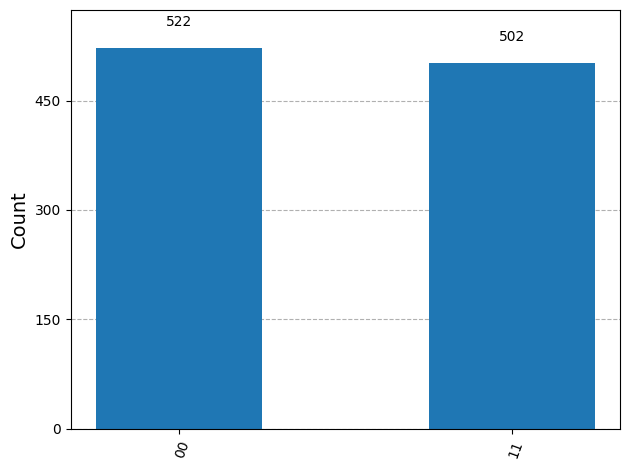

In [12]:
# Function to create a bell state circuit
def create_bell_circuit():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

circuit = create_bell_circuit()
circuit.measure_all()  # Add measurements

transpiled = transpile(circuit, sim_backend)
result = sim_backend.run(transpiled, shots=1024).result()
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

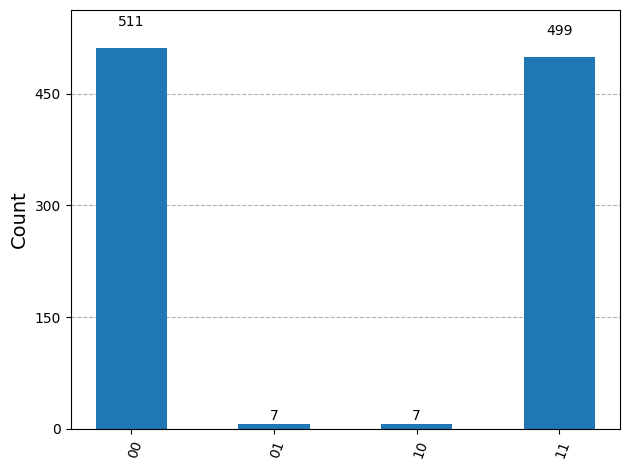

In [13]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
circuit_hardware = pm.run(circuit)

sampler = Sampler(mode=backend)
job = sampler.run([circuit_hardware], shots=1024)
counts = job.result()[0].data.meas.get_counts()
plot_histogram(counts)

## Quantum Computers

### Bits → Qubits

Quantum computers use **qubits** (quantum bits), which differ fundamentally from classical bits:

- **Computational basis states**: |0⟩ and |1⟩ (analogous to classical 0 and 1)
- **Superposition**: A qubit can exist as a linear combination of basis states:

$$|\psi\rangle = c_0 |0\rangle + c_1 |1\rangle$$

where $c_0$ and $c_1$ are complex amplitudes with $|c_0|^2 + |c_1|^2 = 1$

- **Quantum phase**: Because amplitudes are complex, we can write $c_i = |c_i|e^{i\phi_i}$
  - Global phase: $e^{i\phi_0}$ has no observable effect
  - Relative phase: $\phi = \phi_1 - \phi_0$ is observable and important

### Multiple Qubits

For N qubits, the state is a superposition of all 2^N computational basis states:

$$|\psi_N\rangle = \sum_{i=0}^{2^N-1} c_i |i\rangle$$

**Example: 3-qubit state**
$$|\psi_3\rangle = c_0|000\rangle + c_1|001\rangle + c_2|010\rangle + c_3|011\rangle + c_4|100\rangle + c_5|101\rangle + c_6|110\rangle + c_7|111\rangle$$

#### Little-endian Notation
Qubits are indexed from right to left: qubit 0 (rightmost) to qubit N-1 (leftmost)
- This matches binary number representation: qubit 0 has coefficient $2^0$, qubit N-1 has $2^{(N-1)}$

### Entanglement

**Entanglement** is a uniquely quantum property where qubits become correlated such that the state of one qubit depends on the state of another, regardless of distance.

#### Examples of Entangled States:

**Bell State (Equal superposition with correlation):**
$$|\psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$
- If qubit 0 is measured as |0⟩, qubit 1 is guaranteed to be |0⟩
- If qubit 0 is measured as |1⟩, qubit 1 is guaranteed to be |1⟩

**Opposite Correlation:**
$$|\psi\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$$
- If qubit 0 is |0⟩, qubit 1 must be |1⟩
- If qubit 0 is |1⟩, qubit 1 must be |0⟩

## Quantum Gates

### Single-Qubit Gates

#### Pauli Gates

**X gate (Pauli-X, NOT gate):** Flips |0⟩ ↔ |1⟩
$$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

**Y gate (Pauli-Y):**
$$Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$$

**Z gate (Pauli-Z):** Applies phase
$$Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

#### Hadamard Gate
Creates superposition:
$$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

Effect: $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

### Two-Qubit Gates

#### CNOT (Controlled-NOT)
Flips target qubit if control qubit is |1⟩
$$CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$

**In Qiskit:** `circuit.cx(control_qubit, target_qubit)` or `qc.cnot(control, target)` applies this gate.

#### Controlled-Z (CZ)
Applies Z gate to target if control is |1⟩: `circuit.cz(control, target)`

#### Controlled-Y (CY)
Applies Y gate to target if control is |1⟩: `circuit.cy(control, target)`

#### SWAP Gate
Exchanges states of two qubits: `circuit.swap(qubit1, qubit2)`

#### Fredkin Gate (Controlled-SWAP, CSWAP)
If control is |1⟩, swaps two target qubits
**In Qiskit:** `circuit.cswap(control, target1, target2)`

**Important property:** The Fredkin gate is **self-inverse**, meaning $CSWAP \cdot CSWAP = I$

In [ ]:
def simulate_and_histogram(qc, backend=sim_backend, shots=8192):
    """Run a circuit on a simulator and return counts and histogram plot."""
    tqc = transpile(qc, backend)
    sampler = Sampler(backend=backend)
    result = sampler.run(tqc, shots=shots).result()
    counts = result.get_counts(tqc)
    display(plot_histogram(counts))
    return counts

def show_statevector(qc):
    """Get the statevector from the circuit (assuming no measurements before end)."""
    sv = Statevector.from_int(0, 2 ** qc.num_qubits)
    sv = sv.evolve(qc)
    display(plot_state_city(sv))
    return sv

## Problem 1 – Using Quantum Circuits on IBM Q

Using quantum circuits on IBM Q (or a simulator), you are asked to verify:

1. The **Fredkin gate** (controlled‑SWAP) is self‑inverse.  
2. The following identities, where $C$ is the CNOT with qubit 1 as control and qubit 2 as target, and $X_1$ denotes $X$ acting on qubit 1, etc.:

**(a) Fredkin gate self-inverse:** Show that $CSWAP \cdot CSWAP = I$

**(b) CX₁C = X₁X₂:** Verify CNOT-X identity (C is CNOT with control=1, target=2)

**(c) CZ₁C = Z₁:** Verify CZ-identity

**(d) CY₂C = Z₁Y₂:** Verify CY-identity

**(e) CY₁C = Y₁X₂:** Verify another CY-identity

Here the products (e.g. $X_1 X_2$) mean successive applications of gates on possibly different qubits; the equalities are up to global phase.

### Fredkin (controlled‑SWAP) gate – background

The **Fredkin** gate is a three‑qubit gate with a single control and two targets.  
When the control qubit is $\vert 1\rangle$, it swaps the states of the two target qubits; otherwise, it leaves them unchanged.  

In matrix form (in the computational basis $\vert c t_1 t_2\rangle$), it is a $8 \times 8$ unitary that:

- Acts as identity on $\vert 0 t_1 t_2\rangle$
- Swaps $\vert 1 01\rangle \leftrightarrow \vert 1 10\rangle$

To verify that it is **self‑inverse**, you can:

1. Construct a circuit implementing the Fredkin gate (either using built‑in `cswap` or a decomposition).  
2. Compose the gate with itself and compare the resulting unitary or statevector on a set of input basis states.  
3. Show that applying the gate twice gives back the original state (up to global phase).


In [ ]:
# 2.1 Template: Fredkin gate and self-inverse check (no solution filled)

qc_fredkin = QuantumCircuit(3, name="Fredkin")

# TODO: Implement Fredkin (controlled-SWAP) gate on qubits [0 (control), 1, 2]
# Option 1: Use built-in cswap if allowed:
# qc_fredkin.cswap(control, target1, target2)
# Option 2: Decompose into CX and Toffoli gates based on standard constructions.

fredkin_gate = qc_fredkin.to_gate(label="CSWAP")

# Circuit to apply Fredkin twice
qc_test = QuantumCircuit(3)
# TODO: prepare a generic initial state, e.g., superposition on target qubits
# qc_test.h(1)
# qc_test.x(2)
# ...
qc_test.append(fredkin_gate, [0, 1, 2])
qc_test.append(fredkin_gate, [0, 1, 2])

# TODO: Compare qc_test with identity by inspecting statevectors for several initial states.
# e.g., for each computational basis input, apply qc_test and compare with the input.

### Conjugation identities with CNOT

You must verify the following equalities using circuits:

- $C X_1 C = X_1 X_2$ 
- $C Z_1 C = Z_1$
- $C Y_2 C = Z_1 Y_2$
- $C Y_1 C = Y_1 X_2$

Here $C$ is the CNOT with control on qubit 1 and target on qubit 2.  
The notation $C A C$ represents **conjugation** of an operator $A$ by CNOT:

$C A C = C \cdot A \cdot C.$

The equalities should be interpreted as equal up to a global phase, so it is sufficient to compare the action on all computational basis states or the corresponding unitaries (up to phase).  

You can:

1. Build a circuit that applies $C$, then the single‑qubit gate(s), then $C$ again.  
2. Build a second circuit that applies only the purported equivalent gate sequence on the same qubits.  
3. Compare the statevectors for all 4 basis inputs $\vert 00\rangle, \vert 01\rangle, \vert 10\rangle, \vert 11\rangle$.

### General Approach for Verification

To verify an identity like $UVU = W$:

1. **Create two circuits:**
   - Left-hand side: Apply U, then V, then U
   - Right-hand side: Apply W

2. **For each input basis state** (|00⟩, |01⟩, |10⟩, |11⟩):
   - Prepare input state
   - Apply LHS circuit
   - Apply RHS circuit to same initial state
   - Measure and compare statistics

3. **Verification:** If measurement distributions are identical, the identity holds

### Alternative: Direct Statevector Comparison

Use statevector simulation to get exact quantum states and compare amplitudes:

```python
sv_lhs = Statevector.from_instruction(lhs_circuit)
sv_rhs = Statevector.from_instruction(rhs_circuit)
fidelity = state_fidelity(sv_lhs, sv_rhs)  # Should be ≈ 1.0
```

In [ ]:
# 2.2 Template: verifying C A C identities (no explicit answers)

def build_cac_circuit(single_qubit_op, target_qubit, label):
    """Returns a circuit implementing C op C with control on qubit 0, target on qubit 1."""
    qc = QuantumCircuit(2, name=label)
    # CNOT with control on qubit 0, target on qubit 1
    qc.cx(0, 1)
    # Apply single-qubit operator 'single_qubit_op' to given target_qubit
    # Example usage: qc.x(target_qubit), qc.z(target_qubit), qc.y(target_qubit)
    single_qubit_op(qc, target_qubit)
    qc.cx(0, 1)
    return qc

def build_rhs_circuit(op_sequence, label):
    """Returns a circuit implementing the RHS gate sequence, given as a function op_sequence(qc)."""
    qc = QuantumCircuit(2, name=label)
    op_sequence(qc)
    return qc

def compare_two_circuits(qc1, qc2):
    """Compare statevectors of two 2-qubit circuits on all computational basis inputs."""
    for basis in range(4):
        sv_in = Statevector.from_int(basis, 2**2)
        sv1 = sv_in.evolve(qc1)
        sv2 = sv_in.evolve(qc2)
        # TODO: compare sv1 and sv2 up to global phase (e.g. normalize and check ratios)
        # print(basis, np.allclose(...))

# TODO: For each identity, define single_qubit_op, op_sequence and call compare_two_circuits.
# Example pattern (do not fill with the final equality explicitly):
# def single_op_X1(qc, target): qc.x(0) # or similar
# def rhs_X1X2(qc): qc.x(0); qc.x(1)
# qc_left = build_cac_circuit(single_op_X1, target_qubit_index, "C-X1-C")
# qc_right = build_rhs_circuit(rhs_X1X2, "X1-X2")
# compare_two_circuits(qc_left, qc_right)

## Problem 2 – GHZ states

A **GHZ state** for \(N\) qubits is

$\vert \text{GHZ}_N \rangle = \frac{1}{\sqrt{2}} \big( \vert 0\ldots 0 \rangle + \vert 1\ldots 1 \rangle \big)$.

A multipartite entangled state where all qubits are in a balanced superposition but perfectly correlated.

A standard way to prepare $\vert \text{GHZ}_N \rangle$ is:

1. Start from $\vert 0\ldots 0 \rangle$.  
2. Apply a Hadamard gate \(H\) to the first qubit to create

$\frac{1}{\sqrt{2}} (\vert 0 \rangle + \vert 1 \rangle)\vert 0\ldots 0 \rangle.$

3. Apply a series of CNOT gates from the first qubit to each of the remaining \(N-1\) qubits, entangling them to produce the GHZ state.

You are asked to implement and simulate GHZ states for \(N=3,4,5\), and also to run them on at least one IBMQ backend (or specify which backend you choose).  
Use tomography or statevector inspection to confirm the prepared state.

In [7]:
def ghz_circuit(n_qubits: int):
    """Return a template circuit that prepares an N-qubit GHZ state (without final measurement)."""
    qc = QuantumCircuit(n_qubits, name=f"GHZ_{n_qubits}")
    # TODO: implement the standard GHZ construction for n_qubits
    # Example structure:
    # qc.h(0)
    # for i in range(1, n_qubits):
    #     qc.cx(0, i)
    return qc

# 3-qubit GHZ
qc_ghz3 = ghz_circuit(3)
# 4-qubit GHZ
qc_ghz4 = ghz_circuit(4)
# 5-qubit GHZ
qc_ghz5 = ghz_circuit(5)

# TODO: (a) visualize circuits: qc_ghz3.draw('mpl'), etc.
# TODO: (b) inspect statevectors: show_statevector(qc_ghz3)
# TODO: (c) add measurement for simulator / real device runs and plot histograms.

## Problem 3 – Preparation of specific 3-qubit states

### General Strategy for State Preparation

To prepare $|\psi\rangle = \frac{1}{\sqrt{2}}(|state_1\rangle + |state_2\rangle)$:

1. **Analyze the two basis states:**
   - Identify which qubits differ between the two states
   - Identify which qubits are the same

2. **Create superposition:**
   - Use Hadamard gates for superposition
   - Use CNOT and other gates for conditional state preparation

3. **Verify:**
   - Use statevector simulation
   - Use measurement statistics
   - Calculate fidelity with target state

You are asked to obtain quantum circuits that prepare:

1. $\frac{1}{\sqrt{2}}(\vert 001\rangle + \vert 110\rangle)$  
2. $\frac{1}{\sqrt{2}}(\vert 101\rangle + \vert 010\rangle)$
3. $\frac{1}{\sqrt{2}}(\vert 100\rangle + \vert 011\rangle)$

Analyze the pattern of bits in each pair to find the preparation strategy.

General strategy:

- Start from $\vert 000\rangle$.  
- Use a minimal number of gates to create a superposition of two basis states with equal amplitudes.  
- One common pattern is to first prepare a Bell‑like entangled state on two qubits, then use additional gates to correlate or flip the third qubit as needed.  
- Alternatively, think of these states as GHZ‑like states after appropriate local Pauli operations (e.g., $X$ on some qubits) and possibly qubit re‑labeling.

In [8]:
def state_template_1():
    """Template for preparing (|001> + |110>)/sqrt(2)."""
    qc = QuantumCircuit(3, name="psi1")
    # TODO: Add gates to map |000> to desired superposition.
    # You may follow:
    # - Create a Bell pair on two qubits.
    # - Use CNOTs or X gates to adjust the third qubit and bit patterns.
    return qc

def state_template_2():
    """Template for preparing (|101> + |010>)/sqrt(2)."""
    qc = QuantumCircuit(3, name="psi2")
    # TODO: Similar approach; consider symmetry and bit flips relative to psi1 or GHZ state.
    return qc

def state_template_3():
    """Template for preparing (|100> + |011>)/sqrt(2)."""
    qc = QuantumCircuit(3, name="psi3")
    # TODO: Similar approach.
    return qc

# Example usage (you should test these when you fill them):
qc_psi1 = state_template_1()
qc_psi2 = state_template_2()
qc_psi3 = state_template_3()

# TODO: Verify each using show_statevector(qc_psiX) and by checking that only the desired basis states appear with equal magnitude.

## Problem 4 – W states and tomography

A multipartite entangled state with equal amplitude:

The standard 3-qubit W state is

$\vert W_3 \rangle = \frac{1}{\sqrt{3}}(\vert 001\rangle + \vert 010\rangle + \vert 100\rangle)$.

For a 4-qubit system, a *W-like* state is

$\vert W_4 \rangle = \frac{1}{2}(\vert 0001\rangle + \vert 0010\rangle + \vert 0100\rangle + \vert 1000\rangle).$

### Key Features

- **Normalization:** Each term has amplitude $1/\sqrt{n}$
- **Entanglement:** Loss of any one qubit cannot distinguish the state from separable
- **Contrast with GHZ:** All qubits identical vs. one qubit special

You are asked to:

1. Construct circuits that prepare these states.  
2. Verify their output via **quantum state tomography** on any IBMQ machine.

### Tomography overview (conceptual)

Quantum state tomography reconstructs the density matrix \(\rho\) of a state by performing measurements in a complete set of bases (e.g., combinations of X, Y, Z on each qubit) and then using classical post‑processing to infer \(\rho\).

In Qiskit, there are state‑tomography tools in `qiskit_experiments`. In this notebook, we outline the basic steps conceptually:

1. Choose a set of measurement bases (e.g., tensor products of Pauli X, Y, Z).  
2. For each basis setting, apply the appropriate pre‑measurement rotations (e.g., H for X basis, $S^\dagger H$ for Y basis).  
3. Measure in the computational (Z) basis and collect statistics.  
4. Use a tomography fitter to reconstruct \(\rho\) and compare it with the ideal projector $\vert W\rangle\langle W\vert$.

You may also use simulators to test the tomography procedure before running on hardware.

### Verification Strategy

1. **Measurement statistics:**
   - Count appearances of each basis state
   - For W₃: equal counts for |001⟩, |010⟩, |100⟩

2. **Quantum state tomography:**
   - Measure in computational basis (Z)
   - Measure in X basis (apply H before measuring)
   - Measure in Y basis (apply S†, then H)
   - Reconstruct full density matrix

In [9]:
def w3_circuit():
    """Template for preparing the 3-qubit W state (|001> + |010> + |100>)/sqrt(3)."""
    qc = QuantumCircuit(3, name="W3")
    # TODO: Implement a known W-state construction:
    # - Use rotations and CNOTs to distribute a single excitation over 3 qubits
    #   with equal amplitudes.
    return qc

def w4_circuit():
    """Template for preparing the 4-qubit W-like state (|0001> + |0010> + |0100> + |1000>)/2."""
    qc = QuantumCircuit(4, name="W4")
    # TODO: Implement a 4-qubit W-state circuit using controlled rotations or cascaded CNOTs.
    return qc

qc_w3 = w3_circuit()
qc_w4 = w4_circuit()

# TODO: Verify on simulator via show_statevector(qc_w3), show_statevector(qc_w4).
# TODO: Add measurement and perform (at least basic) tomography steps using appropriate tools.

## Problem 5 – General N-qubit GHZ and W circuits

You are given the generalized forms:

$\vert \text{GHZ}_N \rangle = \frac{1}{\sqrt{2}}(\vert 0\ldots 0\rangle + \vert 1\ldots 1\rangle)$,

$\vert W_N \rangle = \frac{1}{\sqrt{N}}(\vert 0\ldots 01\rangle + \vert 0\ldots 10\rangle + \cdots + \vert 01\ldots 0\rangle + \vert 10\ldots 0\rangle)$.

You must **work out the quantum circuits** that prepare these families for arbitrary \(N\).

### General design ideas

- For $W_N$, you must distribute a single excitation over \(N\) qubits with equal amplitudes. Common approaches include:

  - A binary tree of controlled rotations that successively split amplitude between qubits.  
  - A sequence of controlled $R_y(\theta_k)$ rotations where the angles $\theta_k$ are chosen so that after each step, the probability of finding the excitation on a given subset of qubits is uniform.


In [10]:
def ghz_general(n_qubits: int):
    """General N-qubit GHZ circuit template."""
    qc = QuantumCircuit(n_qubits, name=f"GHZ_{n_qubits}")
    # TODO: Implement the general GHZ pattern for n_qubits (see Section 3).
    return qc

def w_general(n_qubits: int):
    """General N-qubit W-state circuit template."""
    qc = QuantumCircuit(n_qubits, name=f"W_{n_qubits}")
    # TODO: Implement a scalable W-state construction using controlled rotations.
    # Hint: design angles so that after k steps, the excitation has equal weight
    # over the first k+1 qubits.
    return qc

# Example: construct GHZ_6 and W_6 templates (for your own testing)
qc_ghz6 = ghz_general(6)
qc_w6 = w_general(6)

# TODO: Verify numerically (on simulator) that these circuits produce the desired states.

## Running on IBMQ hardware and reporting

For problems that explicitly ask for hardware results (e.g., GHZ and W states), follow this pattern:

1. Choose an appropriate backend (few qubits, low error rates, reasonable queue).  
2. Transpile your circuit for that backend, possibly with an initial layout.  
3. Run the job using `Sampler` or `backend.run`.  
4. Compare the measured distributions / reconstructed states with the ideal ones using fidelity measures (e.g., state fidelity, trace distance).  
5. Document which backend, date/time, and number of shots were used.

In [ ]:
# Example pattern (fill with your own circuit and backend)

# circuit = create_bell_circuit()
# circuit.measure_all()  # Add measurements

# pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
# circuit_hardware = pm.run(circuit)

# sampler = Sampler(mode=backend)
# job = sampler.run([circuit_hardware], shots=1024)
# counts = job.result()[0].data.meas.get_counts()
# plot_histogram(counts)
# # TODO: process result and compare with ideal distribution

## Resources and References

### Qiskit Documentation
- [Qiskit Main Documentation](https://qiskit.org/documentation/)
- [Qiskit Textbook](https://qiskit.org/textbook/)
- [IBM Quantum Composer](https://quantum-computing.ibm.com/)

### Key Qiskit Classes and Methods

**Circuit Creation:**
- `QuantumCircuit(num_qubits)` - Create circuit
- `QuantumCircuit(qregs, cregs)` - Create with quantum and classical registers

**Single-qubit gates:**
- `circuit.h(qubit)` - Hadamard
- `circuit.x(qubit)`, `circuit.y(qubit)`, `circuit.z(qubit)` - Pauli gates
- `circuit.s(qubit)`, `circuit.t(qubit)` - Phase gates
- `circuit.rx(angle, qubit)`, `circuit.ry(angle, qubit)`, `circuit.rz(angle, qubit)` - Rotations

**Two-qubit gates:**
- `circuit.cx(control, target)` - CNOT
- `circuit.cz(control, target)` - Controlled-Z
- `circuit.cy(control, target)` - Controlled-Y
- `circuit.swap(q1, q2)` - SWAP
- `circuit.cswap(control, target1, target2)` - Fredkin (controlled-SWAP)

**Measurement:**
- `circuit.measure(qubit, cbit)` - Measure qubit to classical bit
- `circuit.measure_all()` - Add measurement to all qubits

**Visualization:**
- `circuit.draw('mpl')` - Draw as image
- `plot_histogram(counts)` - Plot measurement results
- `Statevector.from_instruction(circuit)` - Get statevector
- `state_fidelity(state1, state2)` - Compare states

## Helpful Tips and Debugging

### Debugging Strategies

1. **Start simple:** Test with 2 qubits before scaling to more
2. **Use statevector:** Debug without noise using exact quantum state
3. **Check normalization:** Verify amplitudes sum to 1
4. **Visualize circuits:** Use `circuit.draw('mpl')` to verify gate placement
5. **Check expected outputs:** Know what measurement statistics should look like

### Common Issues and Solutions

**Issue:** Superposition states not appearing as expected
- **Check:** Are you using correct gates? Is gate order correct?
- **Solution:** Verify with `Statevector` before running on hardware

**Issue:** GHZ state showing unwanted states in measurement
- **Check:** Are CNOT gates connected correctly?
- **Solution:** Verify control-target pairs, use circuit diagram

**Issue:** W-state construction too complex
- **Strategy:** Break problem into smaller pieces
- **Alternative:** Look for existing W-state constructions in literature

### Performance Considerations

- Use fewer shots for debugging (100-200)
- Use more shots (1000+) for final verification
- Simulator runs faster than hardware
- Transpilation may optimize or add gates for hardware constraints